In [2]:
from sklearn import datasets,tree
from sklearn.metrics import accuracy_score, precision_score,recall_score,f1_score
from sklearn.metrics import mean_squared_error, r2_score


In [31]:
### 1.7.1 决策树分类
# 加载iris数据集，数据集简单，便于可视化决策树
X_digits, y_digits = datasets.load_iris(return_X_y=True)
#X_digits = X_digits / X_digits.max()

n_samples = len(X_digits)

#训练集和测试集划分
X_train = X_digits[: int(0.9 * n_samples)]  #取前90%的数据作为训练集，其余作为测试集
y_train = y_digits[: int(0.9 * n_samples)]
X_test = X_digits[int(0.9 * n_samples) :]
y_test = y_digits[int(0.9 * n_samples) :]

#创建模型，DecisionTreeClassifier分类器
clf = tree.DecisionTreeClassifier(max_depth=3) #max_depth树的最大深度，还有很多其他参数，此处使用默认值

#模型训练
clf.fit(X_train, y_train) #对于分类问题，可以通过简单的多数投票法来确定预测类别

#模型预测
y_pred = clf.predict(X_test)

##评价指标
# accuracy
print("accuracy_score: \n", accuracy_score(y_test,y_pred)) #不平衡类别分布的情况下可能会失效

# precision指标
print("precision_score: %.2f" % precision_score(y_test,y_pred,average='macro')) #多分类，需要加average参数

# recall_score指标
print("recall_score: %.2f" % recall_score(y_test,y_pred,average='macro'))

#f1指标
print("f1_score: %.2f" % f1_score(y_test,y_pred,average='macro'))


accuracy_score: 
 1.0
precision_score: 1.00
recall_score: 1.00
f1_score: 1.00


[Text(0.375, 0.875, 'x[2] <= 2.45\ngini = 0.658\nsamples = 135\nvalue = [50, 50, 35]'),
 Text(0.25, 0.625, 'gini = 0.0\nsamples = 50\nvalue = [50, 0, 0]'),
 Text(0.5, 0.625, 'x[2] <= 4.85\ngini = 0.484\nsamples = 85\nvalue = [0, 50, 35]'),
 Text(0.25, 0.375, 'x[3] <= 1.65\ngini = 0.08\nsamples = 48\nvalue = [0, 46, 2]'),
 Text(0.125, 0.125, 'gini = 0.0\nsamples = 45\nvalue = [0, 45, 0]'),
 Text(0.375, 0.125, 'gini = 0.444\nsamples = 3\nvalue = [0, 1, 2]'),
 Text(0.75, 0.375, 'x[3] <= 1.75\ngini = 0.193\nsamples = 37\nvalue = [0, 4, 33]'),
 Text(0.625, 0.125, 'gini = 0.5\nsamples = 8\nvalue = [0, 4, 4]'),
 Text(0.875, 0.125, 'gini = 0.0\nsamples = 29\nvalue = [0, 0, 29]')]

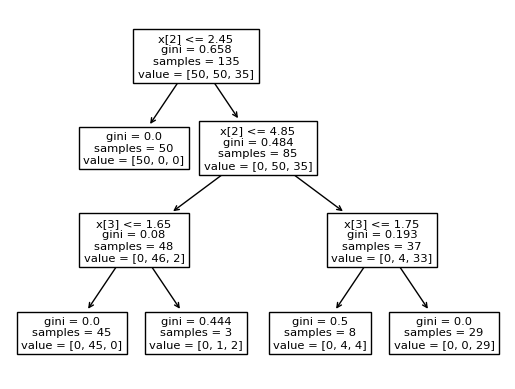

In [32]:
#绘制决策树
tree.plot_tree(clf)

In [25]:
### 1.7.2 决策树回归
# 加载diabetes数据集
diabetes_X, diabetes_y = datasets.load_diabetes(return_X_y=True)

# 特征数据划分训练集和测试集
diabetes_X_train = diabetes_X[:-20] #后20个样本作为测试集，其余作为训练集
diabetes_X_test = diabetes_X[-20:]

# 标签（类别）数据划分训练集和测试集
diabetes_y_train = diabetes_y[:-20] #后20个样本作为测试集，其余作为训练集
diabetes_y_test = diabetes_y[-20:]

#创建模型，DecisionTreeRegressor回归器
clf = tree.DecisionTreeRegressor(max_depth=2)   #max_depth树的最大深度，还有很多其他参数，此处使用默认值                                                    

#模型训练
clf.fit(diabetes_X_train, diabetes_y_train)  #对于回归问题，预测值通常是这k个最近邻的目标值的平均值（或加权平均值）                            

#模型预测
y_pred = clf.predict(diabetes_X_test)      

# 模型评估MSE指标
print("Mean squared error: %.2f" % mean_squared_error(diabetes_y_test, y_pred))

# 模型评估R2指标
print("Coefficient of determination: %.2f" % r2_score(diabetes_y_test, y_pred))


Mean squared error: 2196.24
Coefficient of determination: 0.55


[Text(0.5, 0.8333333333333334, 'x[8] <= -0.004\nsquared_error = 5948.572\nsamples = 422\nvalue = 153.363'),
 Text(0.25, 0.5, 'x[2] <= 0.006\nsquared_error = 3304.157\nsamples = 206\nvalue = 111.112'),
 Text(0.125, 0.16666666666666666, 'squared_error = 2170.471\nsamples = 159\nvalue = 96.736'),
 Text(0.375, 0.16666666666666666, 'squared_error = 4075.084\nsamples = 47\nvalue = 159.745'),
 Text(0.75, 0.5, 'x[2] <= 0.015\nsquared_error = 5144.392\nsamples = 216\nvalue = 193.657'),
 Text(0.625, 0.16666666666666666, 'squared_error = 4117.19\nsamples = 113\nvalue = 164.15'),
 Text(0.875, 0.16666666666666666, 'squared_error = 4268.203\nsamples = 103\nvalue = 226.029')]

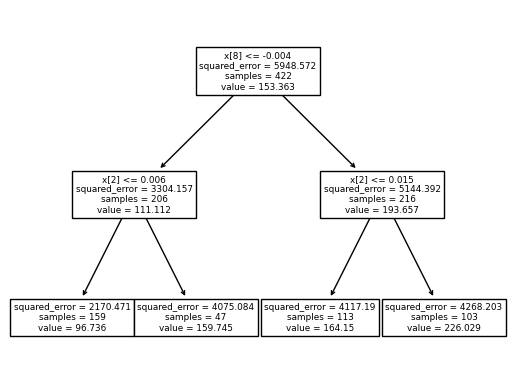

In [26]:
#绘制决策树
tree.plot_tree(clf)

In [ ]:
## 总结
#决策树参数较多，例如树的深度、衡量分割质量的度量标准（信息增益、信息增益率、gini）、用于选择每个节点分割的策略/
#节点分裂所需的最小样本数、叶节点所需的最小样本数、每个节点分割时要考虑的特征数和最大叶节点数等；
#需要多调试，或者通过参数搜索确定参数。